In [1]:
import pandas as pd

In [2]:
# Importa os dados 2018
ENEM_2018 = pd.read_csv(
    '2018\DADOS\MICRODADOS_ENEM_2018.csv',
    delimiter=';',
    encoding='iso-8859-1',
    usecols=['NU_ANO','CO_MUNICIPIO_RESIDENCIA','SG_UF_RESIDENCIA',
             'NU_IDADE','TP_SEXO','TP_LINGUA']
)

#Cria a Coluna Região a partir do CO_MUNICIPIO_RESIDENCIA
ENEM_2018['REGIAO'] = ENEM_2018['CO_MUNICIPIO_RESIDENCIA'].apply(lambda x: str(x)[0])

In [ ]:
ENEM_2018.info()

In [ ]:
ENEM_2018.head()

In [3]:
# Importa os dados 2017
ENEM_2017 = pd.read_csv(
    '2017\DADOS\MICRODADOS_ENEM_2017.csv',
    delimiter=';',
    encoding='iso-8859-1',
    usecols=['NU_ANO','CO_MUNICIPIO_RESIDENCIA','SG_UF_RESIDENCIA',
             'NU_IDADE','TP_SEXO','TP_LINGUA']
)

#Cria a Coluna Região a partir do CO_MUNICIPIO_RESIDENCIA
ENEM_2017['REGIAO'] = ENEM_2017['CO_MUNICIPIO_RESIDENCIA'].apply(lambda x: str(x)[0])

In [ ]:
ENEM_2017.info()

In [ ]:
ENEM_2017.head()

In [4]:
# Importa os dados 2016
ENEM_2016 = pd.read_csv(
    '2016\DADOS\microdados_enem_2016.csv',
    delimiter=';',
    encoding='iso-8859-1',
    usecols=['NU_ANO','CO_MUNICIPIO_RESIDENCIA','SG_UF_RESIDENCIA',
             'NU_IDADE','TP_SEXO','TP_LINGUA']
)

#Cria a Coluna Região a partir do CO_MUNICIPIO_RESIDENCIA
ENEM_2016['REGIAO'] = ENEM_2016['CO_MUNICIPIO_RESIDENCIA'].apply(lambda x: str(x)[0])

In [ ]:
ENEM_2016.info()

In [ ]:
ENEM_2016.head()

In [5]:
# Importa os dados 2015
ENEM_2015 = pd.read_csv(
    '2015\DADOS\MICRODADOS_ENEM_2015.csv',
    delimiter=',',
    encoding='iso-8859-1',
    usecols=['NU_ANO','CO_MUNICIPIO_RESIDENCIA','SG_UF_RESIDENCIA',
             'NU_IDADE','TP_SEXO','TP_LINGUA']
)

#Cria a Coluna Região a partir do CO_MUNICIPIO_RESIDENCIA
ENEM_2015['REGIAO'] = ENEM_2015['CO_MUNICIPIO_RESIDENCIA'].apply(lambda x: str(x)[0])

In [ ]:
ENEM_2015.info()

In [ ]:
ENEM_2015.head()

In [6]:
# Importa os dados 2014
ENEM_2014 = pd.read_csv(
    '2014\DADOS\MICRODADOS_ENEM_2014.csv',
    delimiter=',',
    encoding='iso-8859-1',
    usecols=['NU_ANO','COD_MUNICIPIO_RESIDENCIA','UF_RESIDENCIA',
             'IDADE','TP_SEXO','TP_LINGUA']
)

In [ ]:
ENEM_2014.info()

In [7]:
# Os nomes algumas das colunas dos dados de 2014 estão diferentes dos outros anos.
# Renomeando algumas colunas
ENEM_2014=ENEM_2014.rename(columns={"COD_MUNICIPIO_RESIDENCIA":"CO_MUNICIPIO_RESIDENCIA",
                          "UF_RESIDENCIA":"SG_UF_RESIDENCIA","IDADE":"NU_IDADE"})
#Cria a Coluna Região a partir do CO_MUNICIPIO_RESIDENCIA
ENEM_2014['REGIAO'] = ENEM_2014['CO_MUNICIPIO_RESIDENCIA'].apply(lambda x: str(x)[0])

ENEM_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8722248 entries, 0 to 8722247
Data columns (total 7 columns):
NU_ANO                     int64
CO_MUNICIPIO_RESIDENCIA    int64
SG_UF_RESIDENCIA           object
NU_IDADE                   float64
TP_SEXO                    object
TP_LINGUA                  int64
REGIAO                     object
dtypes: float64(1), int64(3), object(3)
memory usage: 465.8+ MB


In [ ]:
ENEM_2014.head()

In [8]:
ENEM = pd.concat([ENEM_2018,ENEM_2017],
                 sort='SG_UF_RESIDENCIA')
del ENEM_2018,ENEM_2017

ENEM = pd.concat([ENEM,ENEM_2016],
                 sort='SG_UF_RESIDENCIA')
del ENEM_2016

ENEM = pd.concat([ENEM,ENEM_2015],
                 sort='SG_UF_RESIDENCIA')
del ENEM_2015

ENEM = pd.concat([ENEM,ENEM_2014],
                 sort='SG_UF_RESIDENCIA')
del ENEM_2014

In [ ]:
ENEM.info()

In [9]:
import gc
gc.collect()

49

In [ ]:
ENEM.head()

In [ ]:
ENEM.to_csv('MICRODADOS_ENEM_2014a2018.csv',
    sep=';',
    encoding='iso-8859-1'
)

In [10]:
import matplotlib.pyplot as plt

In [11]:
plt.rcParams['figure.figsize'] = (11,7)

In [12]:
ESPANHOL = ENEM[ENEM['TP_LINGUA'] == 1].groupby('NU_ANO').count()['TP_LINGUA']
ESPANHOL

NU_ANO
2014    5310562
2015    4612529
2016    5020795
2017    3749674
2018    2939201
Name: TP_LINGUA, dtype: int64

In [13]:
INGLES = ENEM[ENEM['TP_LINGUA'] == 0].groupby('NU_ANO').count()['TP_LINGUA']
INGLES

NU_ANO
2014    3411686
2015    3133898
2016    3606572
2017    2981667
2018    2574546
Name: TP_LINGUA, dtype: int64

In [ ]:
rate_lingua = pd.DataFrame(columns = ['INGLES', 'ESPANHOL'])

rate_lingua.append(INGLES,ignore_index=True)

rate_lingua

In [ ]:
rate_lingua = pd.DataFrame((ESPANHOL/(INGLES+ESPANHOL)) * 100)
rate_lingua

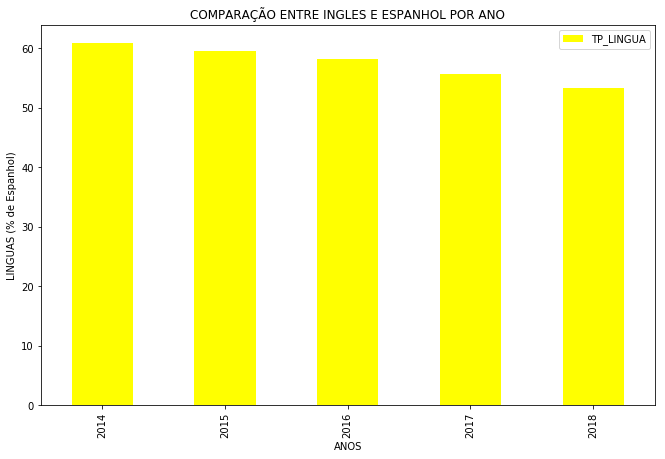

In [14]:
rate_lingua = pd.DataFrame((ESPANHOL/(INGLES+ESPANHOL)) * 100)
rate_lingua.plot(kind='bar',color="Yellow")
plt.title('COMPARAÇÃO ENTRE INGLES E ESPANHOL POR ANO')
plt.xlabel('ANOS')
plt.ylabel('LINGUAS (% de Espanhol)')
plt.show()

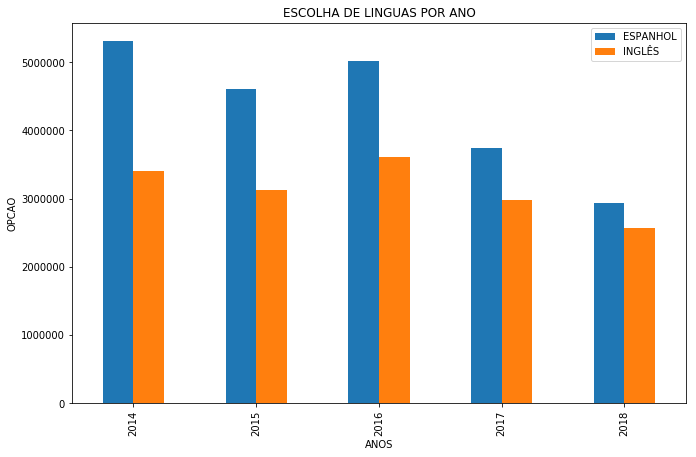

In [15]:
# O GRÁFICO MOSTRA A PROPORÇÃO DE ESCOLHA DA LÍNGUA ESTRANGEIRA, ENTRE ESPANHOL E INGLÊS
pd.DataFrame({
    "ESPANHOL":ESPANHOL,
    "INGLÊS":INGLES,
}).plot(kind='bar')
plt.title('ESCOLHA DE LINGUAS POR ANO')
plt.xlabel('ANOS')
plt.ylabel('OPCAO')
plt.show()

In [16]:
ENEM_NORTE = ENEM[ENEM['REGIAO'] == "1"]
ESPANHOL_NORTE = ENEM_NORTE[ENEM_NORTE['TP_LINGUA'] == 
                            1].groupby('NU_ANO').count()["CO_MUNICIPIO_RESIDENCIA"]

INGLES_NORTE = ENEM_NORTE[ENEM_NORTE['TP_LINGUA'] == 
                          0].groupby('NU_ANO').count()["CO_MUNICIPIO_RESIDENCIA"]
# INGLES_NORTE.head()

In [ ]:
ESPANHOL_NORTE.head()

In [17]:
ENEM_NORDESTE = ENEM[ENEM['REGIAO'] == "2"]
ESPANHOL_NORDESTE = ENEM_NORDESTE[ENEM_NORDESTE['TP_LINGUA'] == 
                                  1].groupby('NU_ANO').count()["CO_MUNICIPIO_RESIDENCIA"]
INGLES_NORDESTE = ENEM_NORDESTE[ENEM_NORDESTE['TP_LINGUA'] == 
                                0].groupby('NU_ANO').count()["CO_MUNICIPIO_RESIDENCIA"]

# INGLES_NORDESTE.head()

In [18]:
ENEM_SUDESTE = ENEM[ENEM['REGIAO'] == "3"]
ESPANHOL_SUDESTE = ENEM_SUDESTE[ENEM_SUDESTE['TP_LINGUA'] == 
                                1].groupby('NU_ANO').count()["CO_MUNICIPIO_RESIDENCIA"]
INGLES_SUDESTE = ENEM_SUDESTE[ENEM_SUDESTE['TP_LINGUA'] == 
                              0].groupby('NU_ANO').count()["CO_MUNICIPIO_RESIDENCIA"]
INGLES_SUDESTE.head()

NU_ANO
2014    1572102
2015    1480533
2016    1671138
2017    1410847
2018    1211450
Name: CO_MUNICIPIO_RESIDENCIA, dtype: int64

In [19]:
ENEM_SUL = ENEM[ENEM['REGIAO'] == "4"]
ESPANHOL_SUL = ENEM_SUL[ENEM_SUL['TP_LINGUA'] == 
                        1].groupby('NU_ANO').count()["CO_MUNICIPIO_RESIDENCIA"]
INGLES_SUL = ENEM_SUL[ENEM_SUL['TP_LINGUA'] == 
                      0].groupby('NU_ANO').count()["CO_MUNICIPIO_RESIDENCIA"]
# INGLES_SUL.head()

In [20]:
ENEM_COESTE = ENEM[ENEM['REGIAO'] == "5"]
ESPANHOL_COESTE = ENEM_COESTE[ENEM_COESTE['TP_LINGUA'] == 
                              1].groupby('NU_ANO').count()["CO_MUNICIPIO_RESIDENCIA"]
INGLES_COESTE = ENEM_COESTE[ENEM_COESTE['TP_LINGUA'] == 
                            0].groupby('NU_ANO').count()["CO_MUNICIPIO_RESIDENCIA"]
# INGLES_COESTE.head()

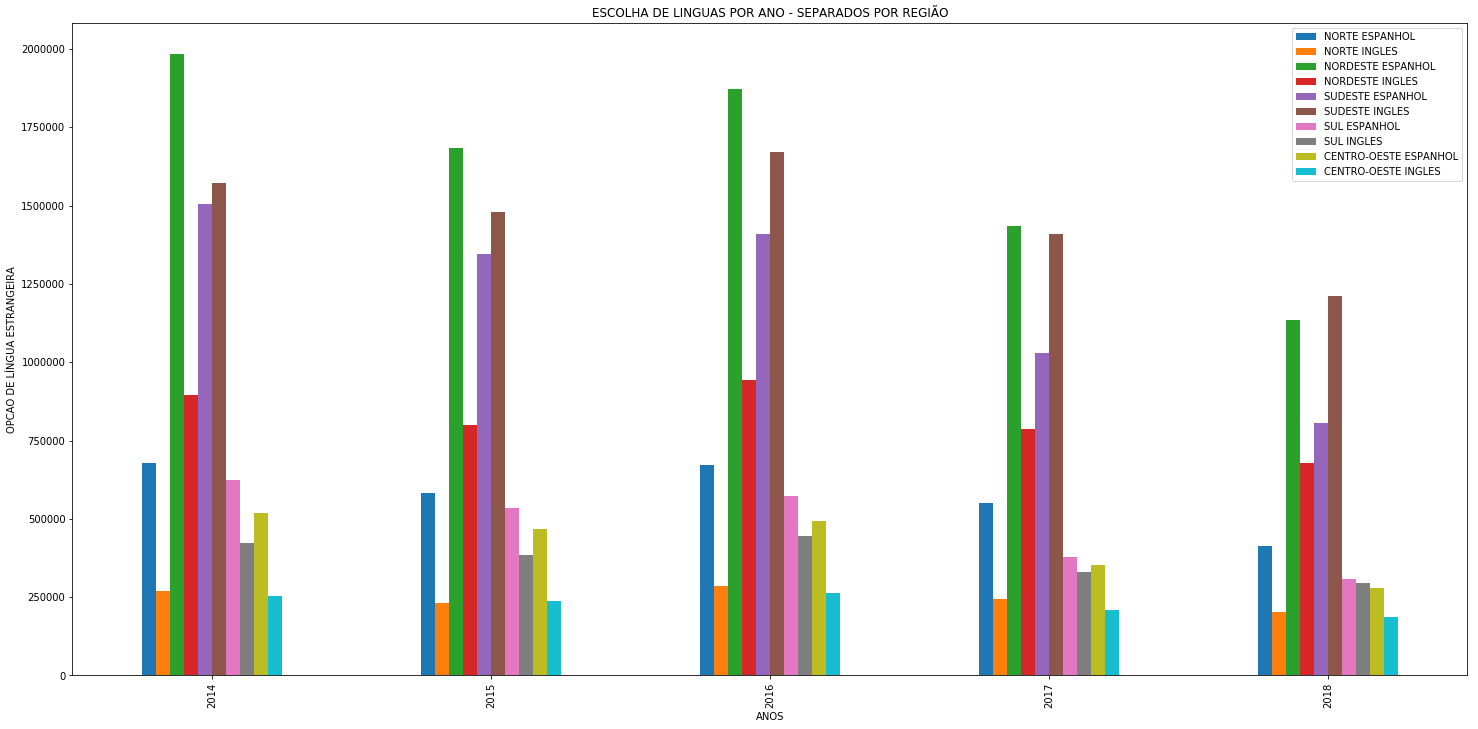

In [23]:
pd.DataFrame({
    "NORTE ESPANHOL":ESPANHOL_NORTE,
    "NORTE INGLES":INGLES_NORTE,
    "NORDESTE ESPANHOL":ESPANHOL_NORDESTE,
    "NORDESTE INGLES":INGLES_NORDESTE,
    "SUDESTE ESPANHOL":ESPANHOL_SUDESTE,
    "SUDESTE INGLES":INGLES_SUDESTE,
    "SUL ESPANHOL":ESPANHOL_SUL,
    "SUL INGLES":INGLES_SUL,
    "CENTRO-OESTE ESPANHOL":ESPANHOL_COESTE,
    "CENTRO-OESTE INGLES":INGLES_COESTE,
}).plot(kind='bar')
plt.rcParams['figure.figsize'] = (25,11)
plt.title('ESCOLHA DE LINGUAS POR ANO - SEPARADOS POR REGIÃO')
plt.xlabel('ANOS')
plt.ylabel('OPCAO DE LÍNGUA ESTRANGEIRA')
plt.show()

In [ ]:
INGLES_COESTE.head()

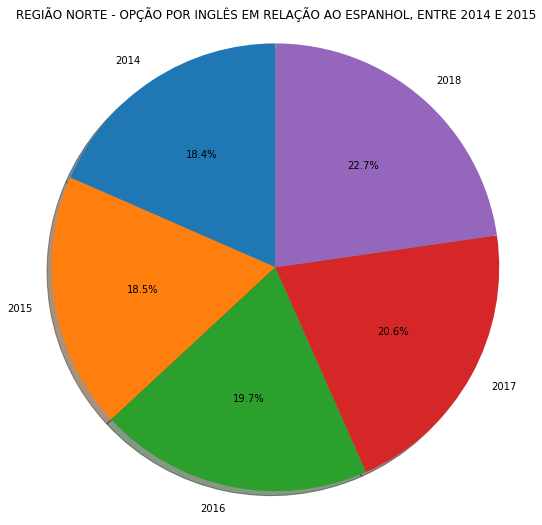

In [24]:
# NORTE - REGIÃO 1
labels = '2014', '2015', '2016', '2017', '2018'
sizes = [INGLES_NORTE.loc[2014]/ESPANHOL_NORTE.loc[2014],INGLES_NORTE.loc[2015]/ESPANHOL_NORTE.loc[2015],
         INGLES_NORTE.loc[2016]/ESPANHOL_NORTE.loc[2016],INGLES_NORTE.loc[2017]/ESPANHOL_NORTE.loc[2017],
         INGLES_NORTE.loc[2018]/ESPANHOL_NORTE.loc[2018]]

fig1, ax1 = plt.subplots(figsize=(9, 9))

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('REGIÃO NORTE - OPÇÃO POR INGLÊS EM RELAÇÃO AO ESPANHOL, ENTRE 2014 E 2015')
ax1.axis('equal')
plt.show()

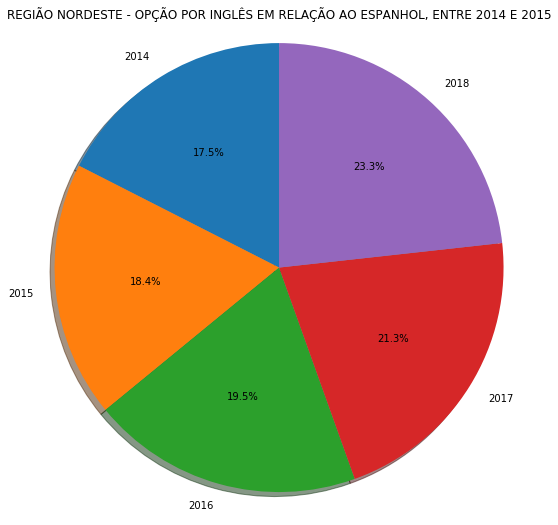

In [25]:
# NORDESTE - REGIÃO 2
labels = '2014', '2015', '2016', '2017', '2018'
sizes = [INGLES_NORDESTE.loc[2014]/ESPANHOL_NORDESTE.loc[2014],INGLES_NORDESTE.loc[2015]/ESPANHOL_NORDESTE.loc[2015],
         INGLES_NORDESTE.loc[2016]/ESPANHOL_NORDESTE.loc[2016],INGLES_NORDESTE.loc[2017]/ESPANHOL_NORDESTE.loc[2017],
         INGLES_NORDESTE.loc[2018]/ESPANHOL_NORDESTE.loc[2018]]

fig1, ax1 = plt.subplots(figsize=(9, 9))

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('REGIÃO NORDESTE - OPÇÃO POR INGLÊS EM RELAÇÃO AO ESPANHOL, ENTRE 2014 E 2015')
ax1.axis('equal')
plt.show()

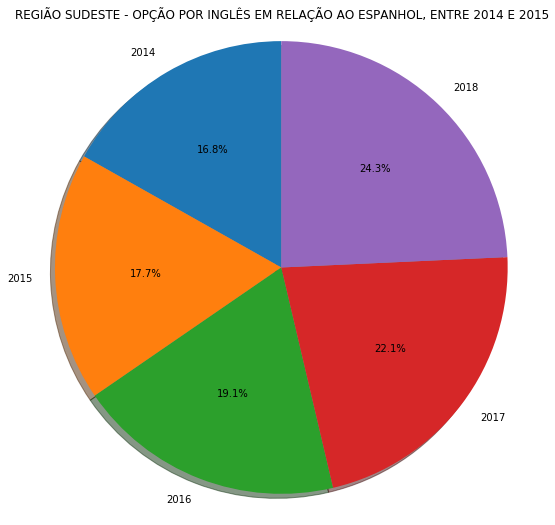

In [26]:
# SUDESTE - REGIÃO 3
labels = '2014', '2015', '2016', '2017', '2018'
sizes = [INGLES_SUDESTE.loc[2014]/ESPANHOL_SUDESTE.loc[2014],INGLES_SUDESTE.loc[2015]/ESPANHOL_SUDESTE.loc[2015],
         INGLES_SUDESTE.loc[2016]/ESPANHOL_SUDESTE.loc[2016],INGLES_SUDESTE.loc[2017]/ESPANHOL_SUDESTE.loc[2017],
         INGLES_SUDESTE.loc[2018]/ESPANHOL_SUDESTE.loc[2018]]

fig1, ax1 = plt.subplots(figsize=(9, 9))

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('REGIÃO SUDESTE - OPÇÃO POR INGLÊS EM RELAÇÃO AO ESPANHOL, ENTRE 2014 E 2015')
ax1.axis('equal')
plt.show()

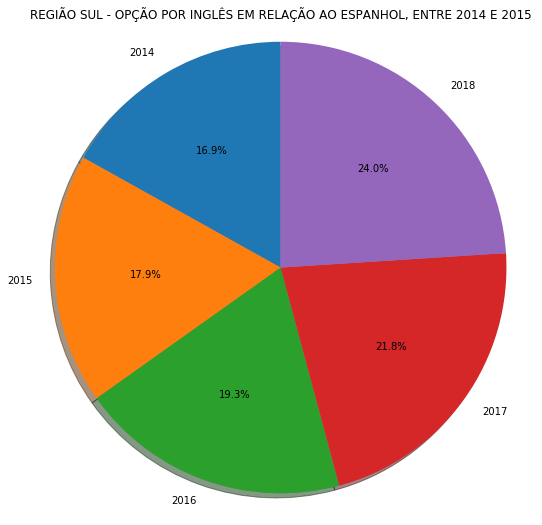

In [27]:
# SUL - REGIÃO 4
labels = '2014', '2015', '2016', '2017', '2018'
sizes = [INGLES_SUL.loc[2014]/ESPANHOL_SUL.loc[2014],INGLES_SUL.loc[2015]/ESPANHOL_SUL.loc[2015],
         INGLES_SUL.loc[2016]/ESPANHOL_SUL.loc[2016],INGLES_SUL.loc[2017]/ESPANHOL_SUL.loc[2017],
         INGLES_SUL.loc[2018]/ESPANHOL_SUL.loc[2018]]

fig1, ax1 = plt.subplots(figsize=(9, 9))

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('REGIÃO SUL - OPÇÃO POR INGLÊS EM RELAÇÃO AO ESPANHOL, ENTRE 2014 E 2015')
ax1.axis('equal')
plt.show()

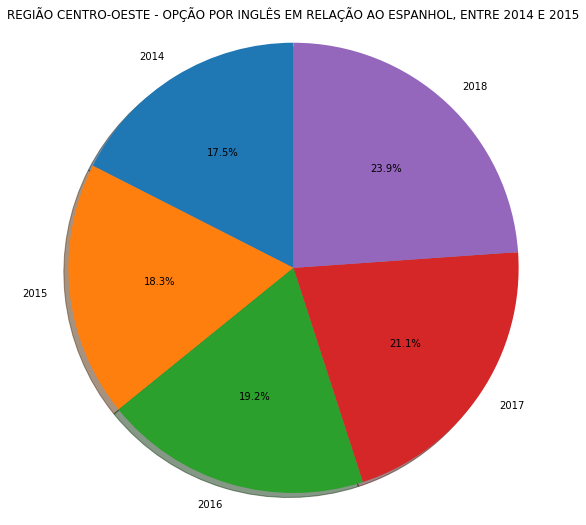

In [28]:
# CENTRO-OESTE - REGIÃO 5
labels = '2014', '2015', '2016', '2017', '2018'
sizes = [INGLES_COESTE.loc[2014]/ESPANHOL_COESTE.loc[2014],INGLES_COESTE.loc[2015]/ESPANHOL_COESTE.loc[2015],
         INGLES_COESTE.loc[2016]/ESPANHOL_COESTE.loc[2016],INGLES_COESTE.loc[2017]/ESPANHOL_COESTE.loc[2017],
         INGLES_COESTE.loc[2018]/ESPANHOL_COESTE.loc[2018]]

fig1, ax1 = plt.subplots(figsize=(9, 9))

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('REGIÃO CENTRO-OESTE - OPÇÃO POR INGLÊS EM RELAÇÃO AO ESPANHOL, ENTRE 2014 E 2015')
ax1.axis('equal')
plt.show()

In [29]:
# BRASIL
ENEM_IDADE = ENEM[ENEM['NU_ANO'] == 2018]

SPA_IDADE = ENEM[ENEM['TP_LINGUA'] == 
                            1].groupby('NU_ANO').mean()
SBRI = SPA_IDADE['NU_IDADE']
ENG_IDADE = ENEM[ENEM['TP_LINGUA'] == 
                          0].groupby('NU_ANO').mean()
EBRI = ENG_IDADE['NU_IDADE']
EBRI.head()

NU_ANO
2014    22.449664
2015    21.979119
2016    21.987138
2017    21.800376
2018    21.248938
Name: NU_IDADE, dtype: float64

In [30]:
# NORTE - REGIÃO 1
SPA_NORTE_IDADE = ENEM_NORTE[ENEM_NORTE['TP_LINGUA'] == 
                            1].groupby('NU_ANO').mean()
SNOI = SPA_NORTE_IDADE['NU_IDADE']
ENG_NORTE_IDADE = ENEM_NORTE[ENEM_NORTE['TP_LINGUA'] == 
                          0].groupby('NU_ANO').mean()
ENOI = ENG_NORTE_IDADE['NU_IDADE']

In [31]:
# NORDESTE - REGIÃO 2
SPA_NORDESTE_IDADE = ENEM_NORDESTE[ENEM_NORDESTE['TP_LINGUA'] == 
                            1].groupby('NU_ANO').mean()
SNDI = SPA_NORDESTE_IDADE['NU_IDADE']
ENG_NORDESTE_IDADE = ENEM_NORDESTE[ENEM_NORDESTE['TP_LINGUA'] == 
                          0].groupby('NU_ANO').mean()
ENDI = ENG_NORDESTE_IDADE['NU_IDADE']

In [32]:
# SUDESTE - REGIÃO 3
SPA_SUDESTE_IDADE = ENEM_SUDESTE[ENEM_SUDESTE['TP_LINGUA'] == 
                            1].groupby('NU_ANO').mean()
SSDI = SPA_SUDESTE_IDADE['NU_IDADE']
ENG_SUDESTE_IDADE = ENEM_SUDESTE[ENEM_SUDESTE['TP_LINGUA'] == 
                          0].groupby('NU_ANO').mean()
ESDI = ENG_SUDESTE_IDADE['NU_IDADE']

In [33]:
# SUL - REGIÃO 4
SPA_SUL_IDADE = ENEM_SUL[ENEM_SUL['TP_LINGUA'] == 
                            1].groupby('NU_ANO').mean()
SSUI = SPA_SUL_IDADE['NU_IDADE']
ENG_SUL_IDADE = ENEM_SUL[ENEM_SUL['TP_LINGUA'] == 
                          0].groupby('NU_ANO').mean()
ESUI = ENG_SUL_IDADE['NU_IDADE']

In [34]:
# CENTRO-OESTE - REGIÃO 5
SPA_COESTE_IDADE = ENEM_COESTE[ENEM_COESTE['TP_LINGUA'] == 
                            1].groupby('NU_ANO').mean()
SCOI = SPA_COESTE_IDADE['NU_IDADE']
ENG_COESTE_IDADE = ENEM_COESTE[ENEM_COESTE['TP_LINGUA'] == 
                          0].groupby('NU_ANO').mean()
ECOI = ENG_COESTE_IDADE['NU_IDADE']

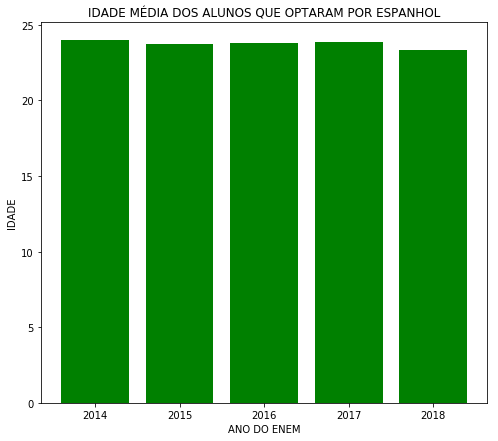

In [36]:
ANO = ['2014','2015','2016','2017','2018']
plt.rcParams['figure.figsize'] = (8,7)
plt.bar(ANO,SBRI,color='green')
plt.xticks(ANO)
plt.ylabel('IDADE')
plt.xlabel('ANO DO ENEM')
plt.title('IDADE MÉDIA DOS ALUNOS QUE OPTARAM POR ESPANHOL')
plt.show()

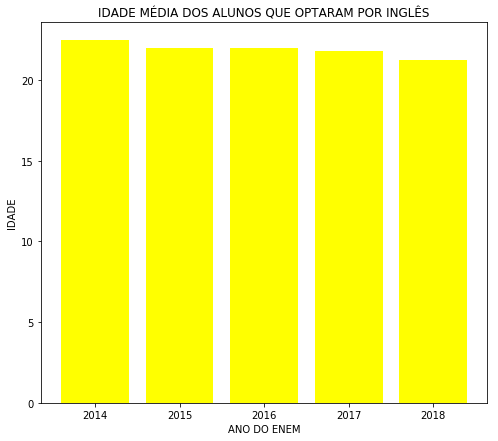

In [37]:
ANO = ['2014','2015','2016','2017','2018']
plt.rcParams['figure.figsize'] = (8,7)
plt.bar(ANO,EBRI,color='yellow')
plt.xticks(ANO)
plt.ylabel('IDADE')
plt.xlabel('ANO DO ENEM')
plt.title('IDADE MÉDIA DOS ALUNOS QUE OPTARAM POR INGLÊS')
plt.show()

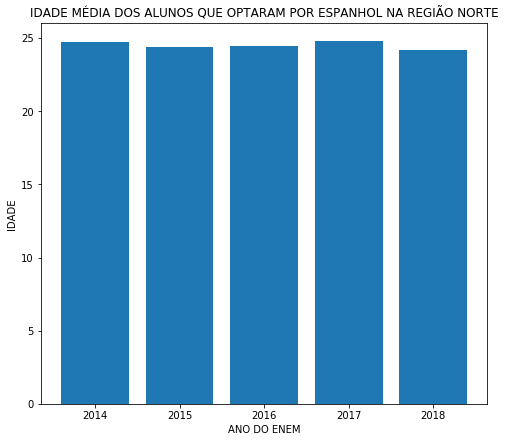

In [38]:
ANO = ['2014','2015','2016','2017','2018']
plt.rcParams['figure.figsize'] = (8,7)
plt.bar(ANO,SNOI)
plt.xticks(ANO)
plt.ylabel('IDADE')
plt.xlabel('ANO DO ENEM')
plt.title('IDADE MÉDIA DOS ALUNOS QUE OPTARAM POR ESPANHOL NA REGIÃO NORTE')
plt.show()

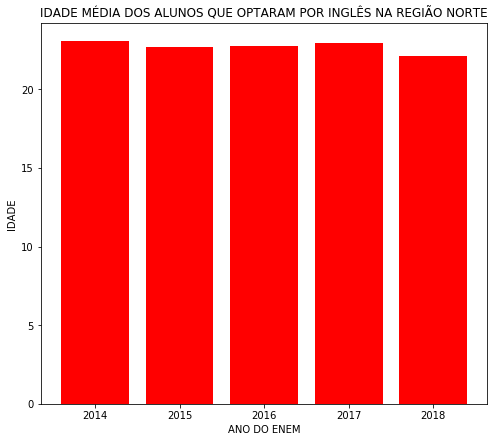

In [39]:
ANO = ['2014','2015','2016','2017','2018']
plt.rcParams['figure.figsize'] = (8,7)
plt.bar(ANO,ENOI,color='red')
plt.xticks(ANO)
plt.ylabel('IDADE')
plt.xlabel('ANO DO ENEM')
plt.title('IDADE MÉDIA DOS ALUNOS QUE OPTARAM POR INGLÊS NA REGIÃO NORTE')
plt.show()

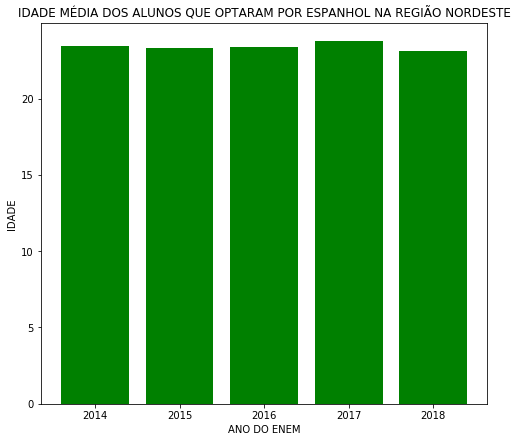

In [40]:
ANO = ['2014','2015','2016','2017','2018']
plt.rcParams['figure.figsize'] = (8,7)
plt.bar(ANO,SNDI,color='green')
plt.xticks(ANO)
plt.ylabel('IDADE')
plt.xlabel('ANO DO ENEM')
plt.title('IDADE MÉDIA DOS ALUNOS QUE OPTARAM POR ESPANHOL NA REGIÃO NORDESTE')
plt.show()

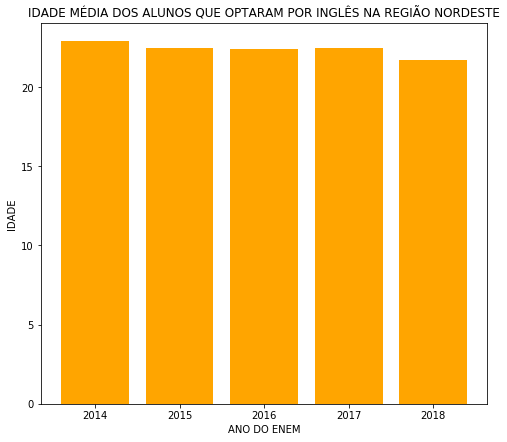

In [41]:
ANO = ['2014','2015','2016','2017','2018']
plt.rcParams['figure.figsize'] = (8,7)
plt.bar(ANO,ENDI,color='orange')
plt.xticks(ANO)
plt.ylabel('IDADE')
plt.xlabel('ANO DO ENEM')
plt.title('IDADE MÉDIA DOS ALUNOS QUE OPTARAM POR INGLÊS NA REGIÃO NORDESTE')
plt.show()

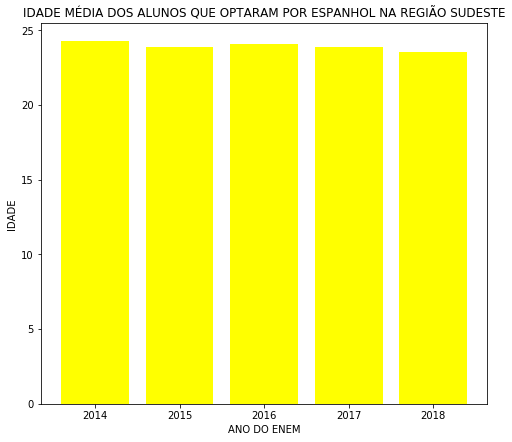

In [42]:
ANO = ['2014','2015','2016','2017','2018']
plt.rcParams['figure.figsize'] = (8,7)
plt.bar(ANO,SSDI,color='YELLOW')
plt.xticks(ANO)
plt.ylabel('IDADE')
plt.xlabel('ANO DO ENEM')
plt.title('IDADE MÉDIA DOS ALUNOS QUE OPTARAM POR ESPANHOL NA REGIÃO SUDESTE')
plt.show()

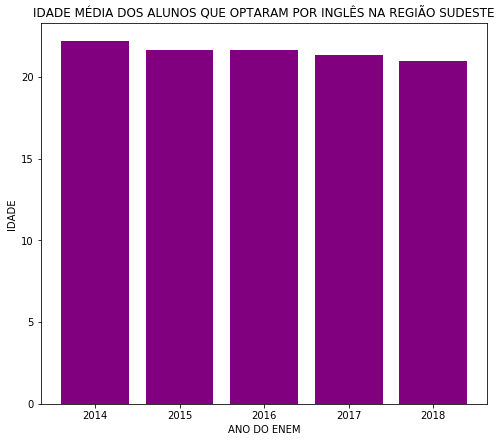

In [43]:
ANO = ['2014','2015','2016','2017','2018']
plt.rcParams['figure.figsize'] = (8,7)
plt.bar(ANO,ESDI,color='purple')
plt.xticks(ANO)
plt.ylabel('IDADE')
plt.xlabel('ANO DO ENEM')
plt.title('IDADE MÉDIA DOS ALUNOS QUE OPTARAM POR INGLÊS NA REGIÃO SUDESTE')
plt.show()

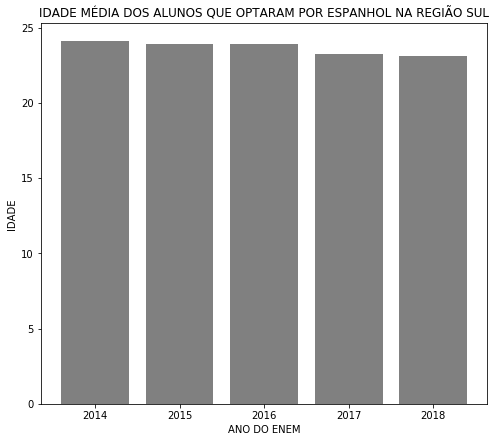

In [44]:
ANO = ['2014','2015','2016','2017','2018']
plt.rcParams['figure.figsize'] = (8,7)
plt.bar(ANO,SSUI,color='gray')
plt.xticks(ANO)
plt.ylabel('IDADE')
plt.xlabel('ANO DO ENEM')
plt.title('IDADE MÉDIA DOS ALUNOS QUE OPTARAM POR ESPANHOL NA REGIÃO SUL')
plt.show()

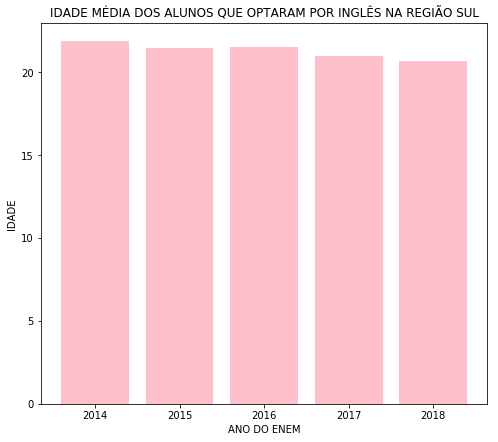

In [45]:
ANO = ['2014','2015','2016','2017','2018']
plt.rcParams['figure.figsize'] = (8,7)
plt.bar(ANO,ESUI,color='pink')
plt.xticks(ANO)
plt.ylabel('IDADE')
plt.xlabel('ANO DO ENEM')
plt.title('IDADE MÉDIA DOS ALUNOS QUE OPTARAM POR INGLÊS NA REGIÃO SUL')
plt.show()

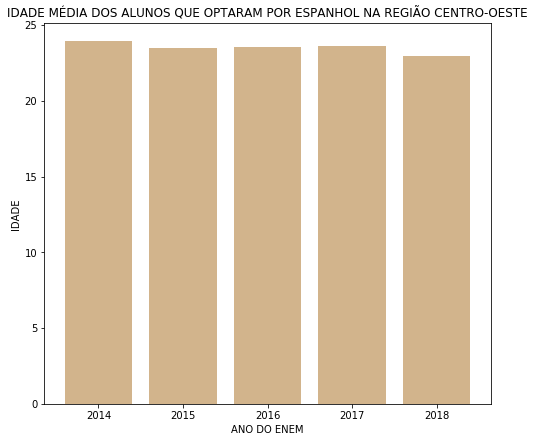

In [46]:
ANO = ['2014','2015','2016','2017','2018']
plt.rcParams['figure.figsize'] = (8,7)
plt.bar(ANO,SCOI,color='tan')
plt.xticks(ANO)
plt.ylabel('IDADE')
plt.xlabel('ANO DO ENEM')
plt.title('IDADE MÉDIA DOS ALUNOS QUE OPTARAM POR ESPANHOL NA REGIÃO CENTRO-OESTE')
plt.show()

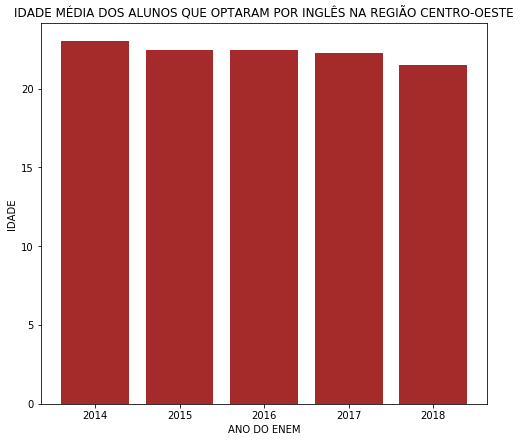

In [47]:
ANO = ['2014','2015','2016','2017','2018']
plt.rcParams['figure.figsize'] = (8,7)
plt.bar(ANO,ECOI,color='brown')
plt.xticks(ANO)
plt.ylabel('IDADE')
plt.xlabel('ANO DO ENEM')
plt.title('IDADE MÉDIA DOS ALUNOS QUE OPTARAM POR INGLÊS NA REGIÃO CENTRO-OESTE')
plt.show()